In [11]:
# general use
import os
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# for evaluation
from numpy import mean, std, log

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

In [2]:
data_dirpath = 'dataset'
train_name = 'train.csv'
test_name = 'test.csv'

train_path = os.path.join(data_dirpath, train_name)
test_path = os.path.join(data_dirpath, test_name)
train_df = pd.read_csv(train_path, header=[0])
test_df = pd.read_csv(test_path, header=[0])

print(f'[Default] Number of train data: {train_df.shape[0]}, Number of test data: {test_df.shape[0]}')


# lead_map = {'Female': 0, 'Male': 1}
# train_df['Lead'] = train_df['Lead'].map(lead_map).astype(int)


x_data=train_df.loc[:, train_df.columns != 'Lead']
y_data=train_df['Lead']

feature_names = x_data.columns.tolist()
train_df.head()

[Default] Number of train data: 1039, Number of test data: 387


,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [3]:
train_df.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [4]:
# train_df["Male/Female Words Ratio"] = (train_df['Number words male']+1) /(train_df['Number words female']+1)
# train_df["Log Male/Female Words Ratio"] = np.log(train_df["Male/Female Words Ratio"])

######################################################

train_df["Male/Female Actors Ratio"] = (train_df['Number of male actors']+1) /(train_df['Number of female actors']+1)
train_df["Log Male/Female Actors Ratio"] = np.log(train_df["Male/Female Actors Ratio"])
train_df["Total Actors"] = train_df['Number of male actors']+train_df['Number of female actors']
train_df["LogGross"] = np.log(train_df["Gross"])

 
train_df.loc[train_df['Lead'] == 'Male', 'Total Male Words'] = train_df['Number words male'] + train_df['Number of words lead']
train_df.loc[train_df['Lead'] != 'Male', 'Total Male Words'] = train_df['Total words'] - (train_df['Number words female'] + train_df['Number of words lead'])

train_df.loc[train_df['Lead'] == 'Female', 'Total Female Words'] = train_df['Number words female'] + train_df['Number of words lead']
train_df.loc[train_df['Lead'] != 'Female', 'Total Female Words'] = train_df['Total words'] - (train_df['Number words male'] + train_df['Number of words lead'])
train_df["Total Male/Female Words Ratio"] = train_df["Total Male Words"] / train_df["Total Female Words"]

train_df['Words per Male Actor'] = train_df['Total Male Words'] / train_df['Number of male actors']
train_df['Words per Female Actor'] = train_df['Total Female Words'] / train_df['Number of female actors']
train_df['Log Words per Male Actor'] = np.log(train_df['Words per Male Actor'])
train_df['Log Words per Female Actor'] = np.log(train_df['Words per Female Actor'])

train_df['Log Total Male Words'] = np.log(train_df['Total Male Words'])
train_df['Log Total Female Words'] = np.log(train_df['Total Female Words'])
train_df["Log Total Male/Female Words Ratio"] = np.log(train_df["Total Male/Female Words Ratio"])

train_df['Lead Word Dominance'] = train_df['Number of words lead'] / train_df['Total words']

train_df["Total Male Words Percentage"] = train_df["Total Male Words"]/train_df["Total words"]
train_df["Total Female Words Percentage"] = train_df["Total Female Words"]/train_df["Total words"]
# train_df["Total Female Words Percentage"] = 1 - train_df["Total Male Words Percentage"]
train_df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,...,Words per Male Actor,Words per Female Actor,Log Words per Male Actor,Log Words per Female Actor,Log Total Male Words,Log Total Female Words,Log Total Male/Female Words Ratio,Lead Word Dominance,Total Male Words Percentage,Total Female Words Percentage
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,...,1315.500000,752.60,7.181972,6.623534,7.875119,8.232972,-0.357853,0.352049,0.411480,0.588520
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,...,806.222222,381.00,6.692359,5.942799,8.889584,7.329094,1.560490,0.230068,0.826424,0.173576
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,...,574.428571,155.00,6.353376,5.043425,8.299286,5.043425,3.255861,0.225575,0.962883,0.037117
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,...,731.833333,536.50,6.595553,6.285067,9.080459,6.978214,2.102246,0.349061,0.891121,0.108879
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,...,796.375000,329.25,6.680070,5.796817,8.759512,7.183112,1.576400,0.498829,0.828694,0.171306


<AxesSubplot:xlabel='Number words female', ylabel='Number words male'>

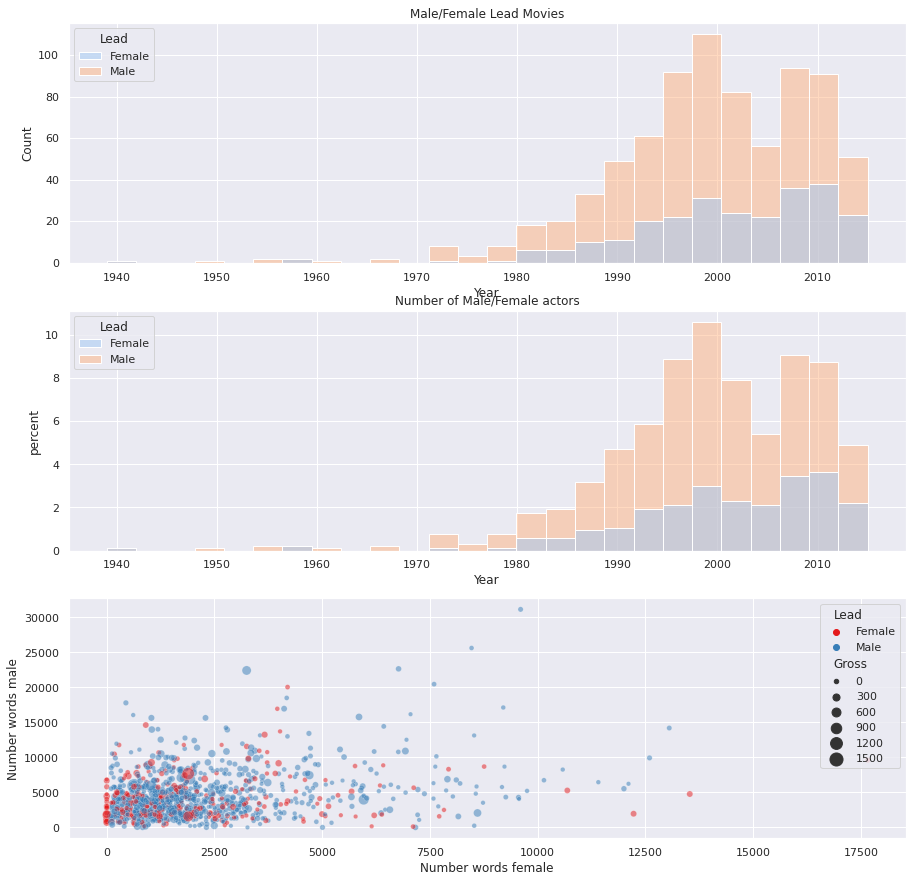

In [5]:
# Visdulize all data

# stacked histogram
f = plt.figure(figsize=(15,15))
ax = f.add_subplot(3,1,1)

# Lead Movies Female/Male
ax1 = sns.histplot(data=train_df, ax=ax, stat="count", multiple="layer",
             x="Year", kde=False,
             palette="pastel", hue="Lead",
             element="bars", legend=True)
ax.set_title("Male/Female Lead Movies")
ax.set_xlabel("Year")
ax.set_ylabel("Count")


# Lead Movies Female/Male
ax = f.add_subplot(3,1,2)
ax = sns.histplot(data=train_df[['Number of male actors', 'Number of female actors', 'Year', 'Lead']], ax=ax, stat="percent", multiple="layer",
             x="Year", kde=False,
             palette="pastel", hue="Lead",
             element="bars", legend=True)
ax.set_title("Number of Male/Female actors")
ax.set_xlabel("Year")
ax.set_ylabel("percent")


# Number words Female/Male
ax = f.add_subplot(3,1,3)
sns.scatterplot(
    data=train_df, x="Number words female", y="Number words male", hue="Lead", size="Gross",
    sizes=(20, 200), size_order=[50, 200, 500, 1000, 2000], alpha=.5, legend="brief", palette=sns.color_palette("Set1", train_df.Lead.nunique())
)

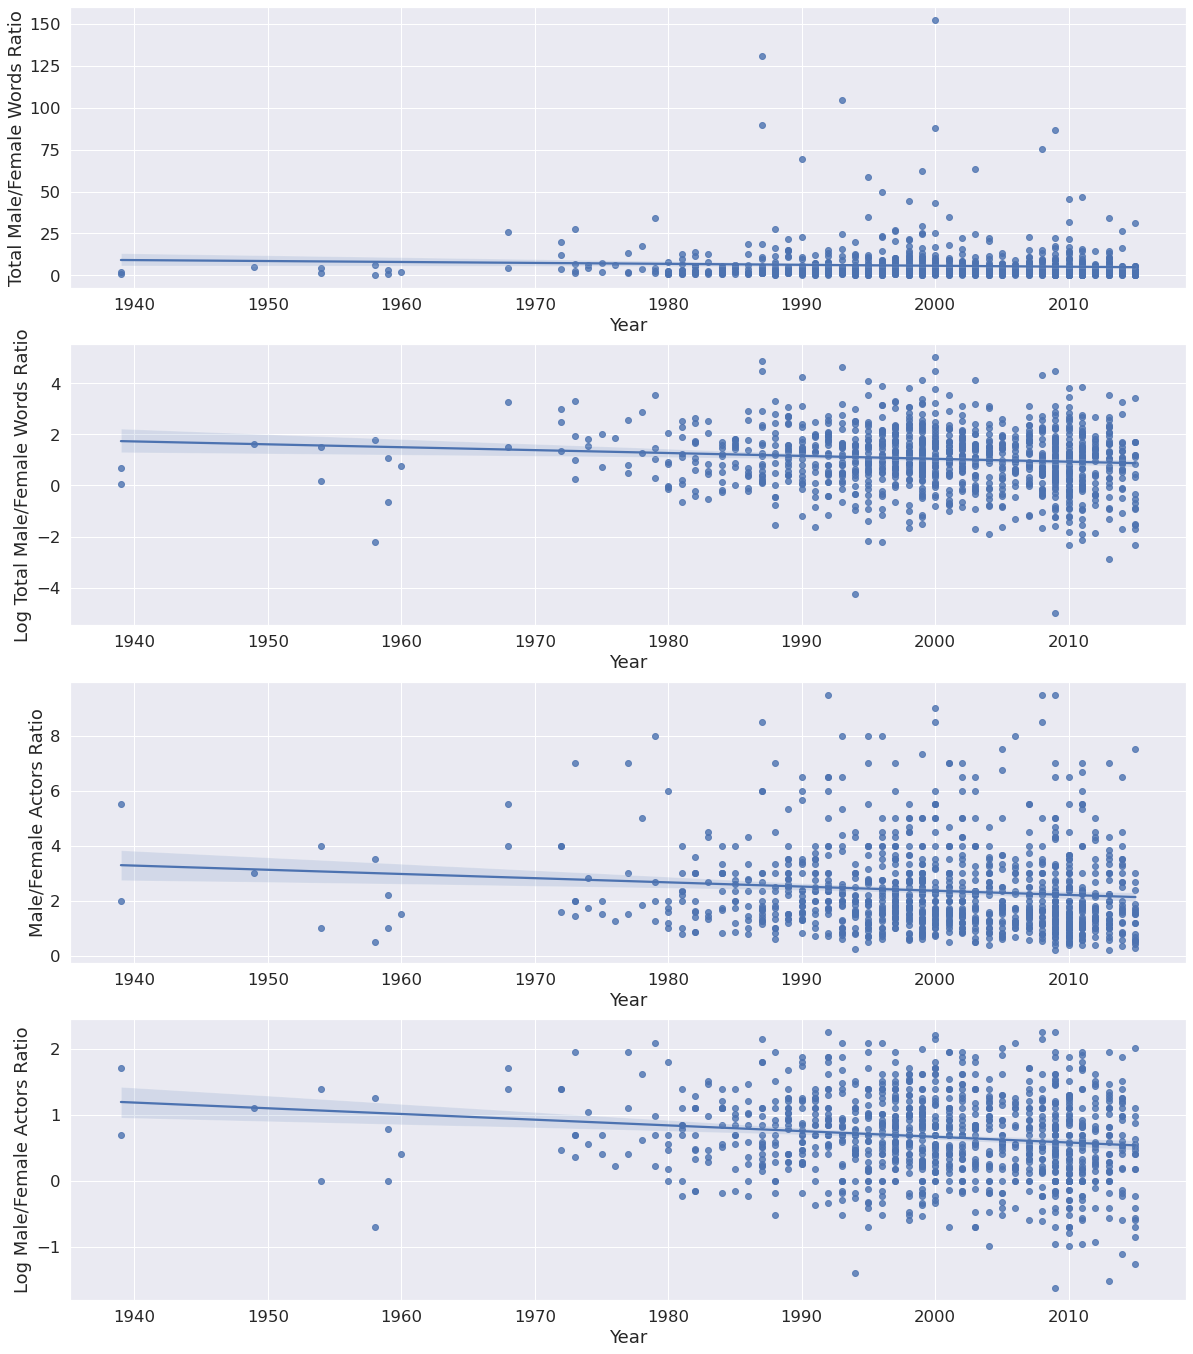

In [6]:
srow = 5
scol = 1
f = plt.figure(figsize=(20, 30))
sns.set(font_scale = 1.5)

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,1)
# sns.lineplot(data=train_df, x="Year", y="Male/Female Words Ratio")
sns.regplot(data=train_df, x="Year", y="Total Male/Female Words Ratio", order=1)

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,2)
# sns.lineplot(data=train_df, x="Year", y="Male/Female Words Ratio")
sns.regplot(data=train_df, x="Year", y="Log Total Male/Female Words Ratio", order=1)

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,3)
# sns.lineplot(data=train_df, x="Year", y="Male/Female Actors Ratio")
sns.regplot(data=train_df, x="Year", y="Male/Female Actors Ratio", order=1)

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,4)
# sns.lineplot(data=train_df, x="Year", y="Male/Female Actors Ratio")
sns.regplot(data=train_df, x="Year", y="Log Male/Female Actors Ratio", order=1)


# sns.set(font_scale = 1.5)
# ax = f.add_subplot(4,2,5)
# sns.lineplot(data=train_df, x="LogGross", y="Male/Female Words Ratio", hue='Lead')

# sns.set(font_scale = 1.5)
# ax = f.add_subplot(4,2,6)
# sns.lineplot(data=train_df, x="LogGross", y="Male/Female Actors Ratio", hue='Lead')

# ax = f.add_subplot(2,2,3)
# ax = sns.set_context('paper')
# sns.barplot(x = 'Lead', y = 'Gross', data = train_df,
#             palette = 'Blues', edgecolor = 'w')



plt.show()

<AxesSubplot:xlabel='LogGross', ylabel='Male/Female Actors Ratio'>

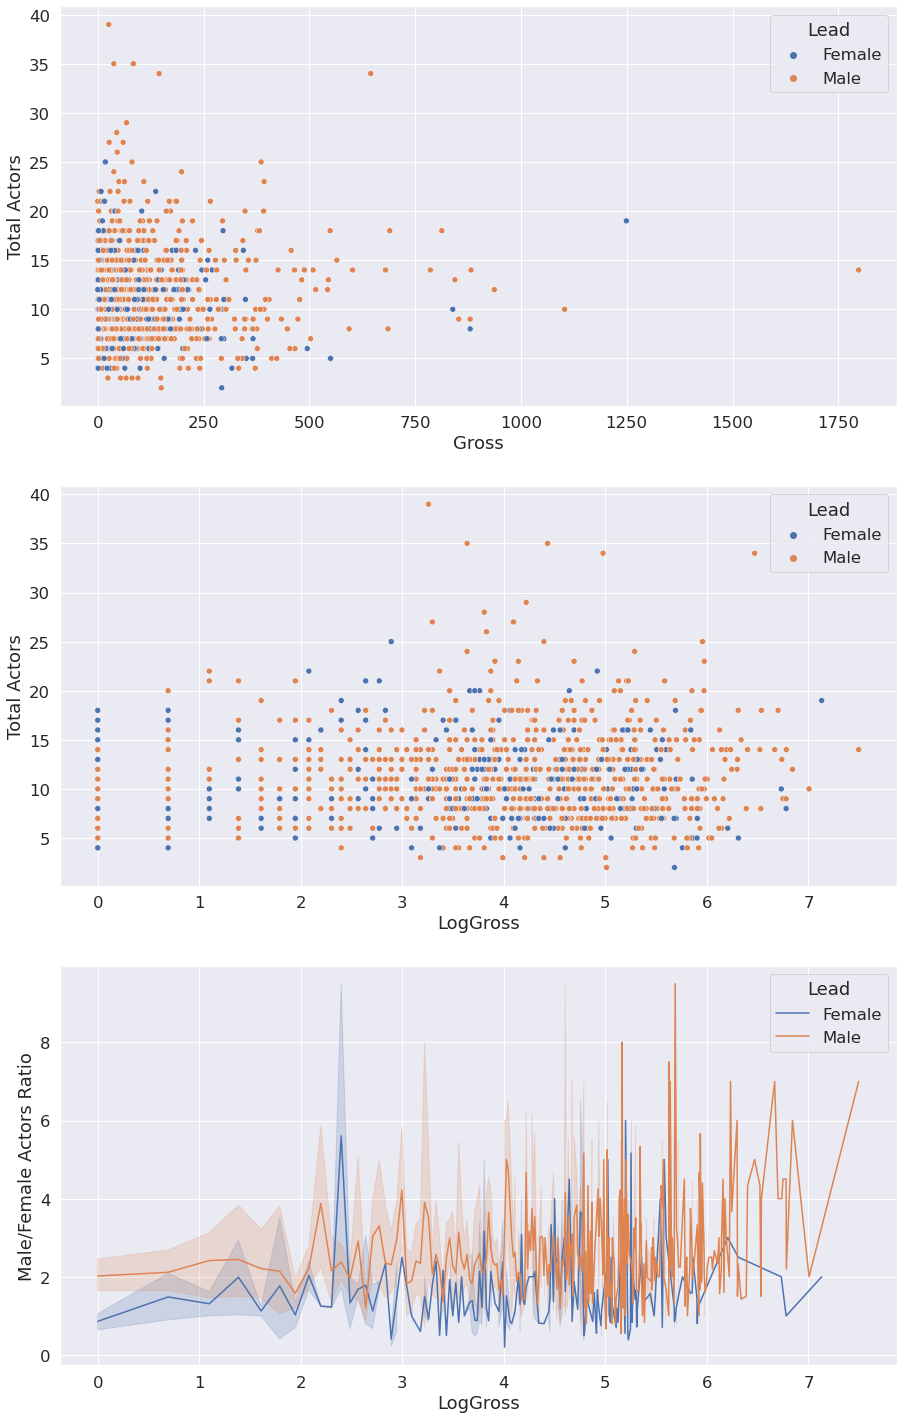

In [7]:
srow = 3
scol = 1
f = plt.figure(figsize=(15, 25))

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,1)
sns.scatterplot(data=train_df, x="Gross", y="Total Actors", hue='Lead')

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,2)
sns.scatterplot(data=train_df, x="LogGross", y="Total Actors", hue='Lead')

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,3)
sns.lineplot(data=train_df, x="LogGross", y="Male/Female Actors Ratio", hue='Lead')

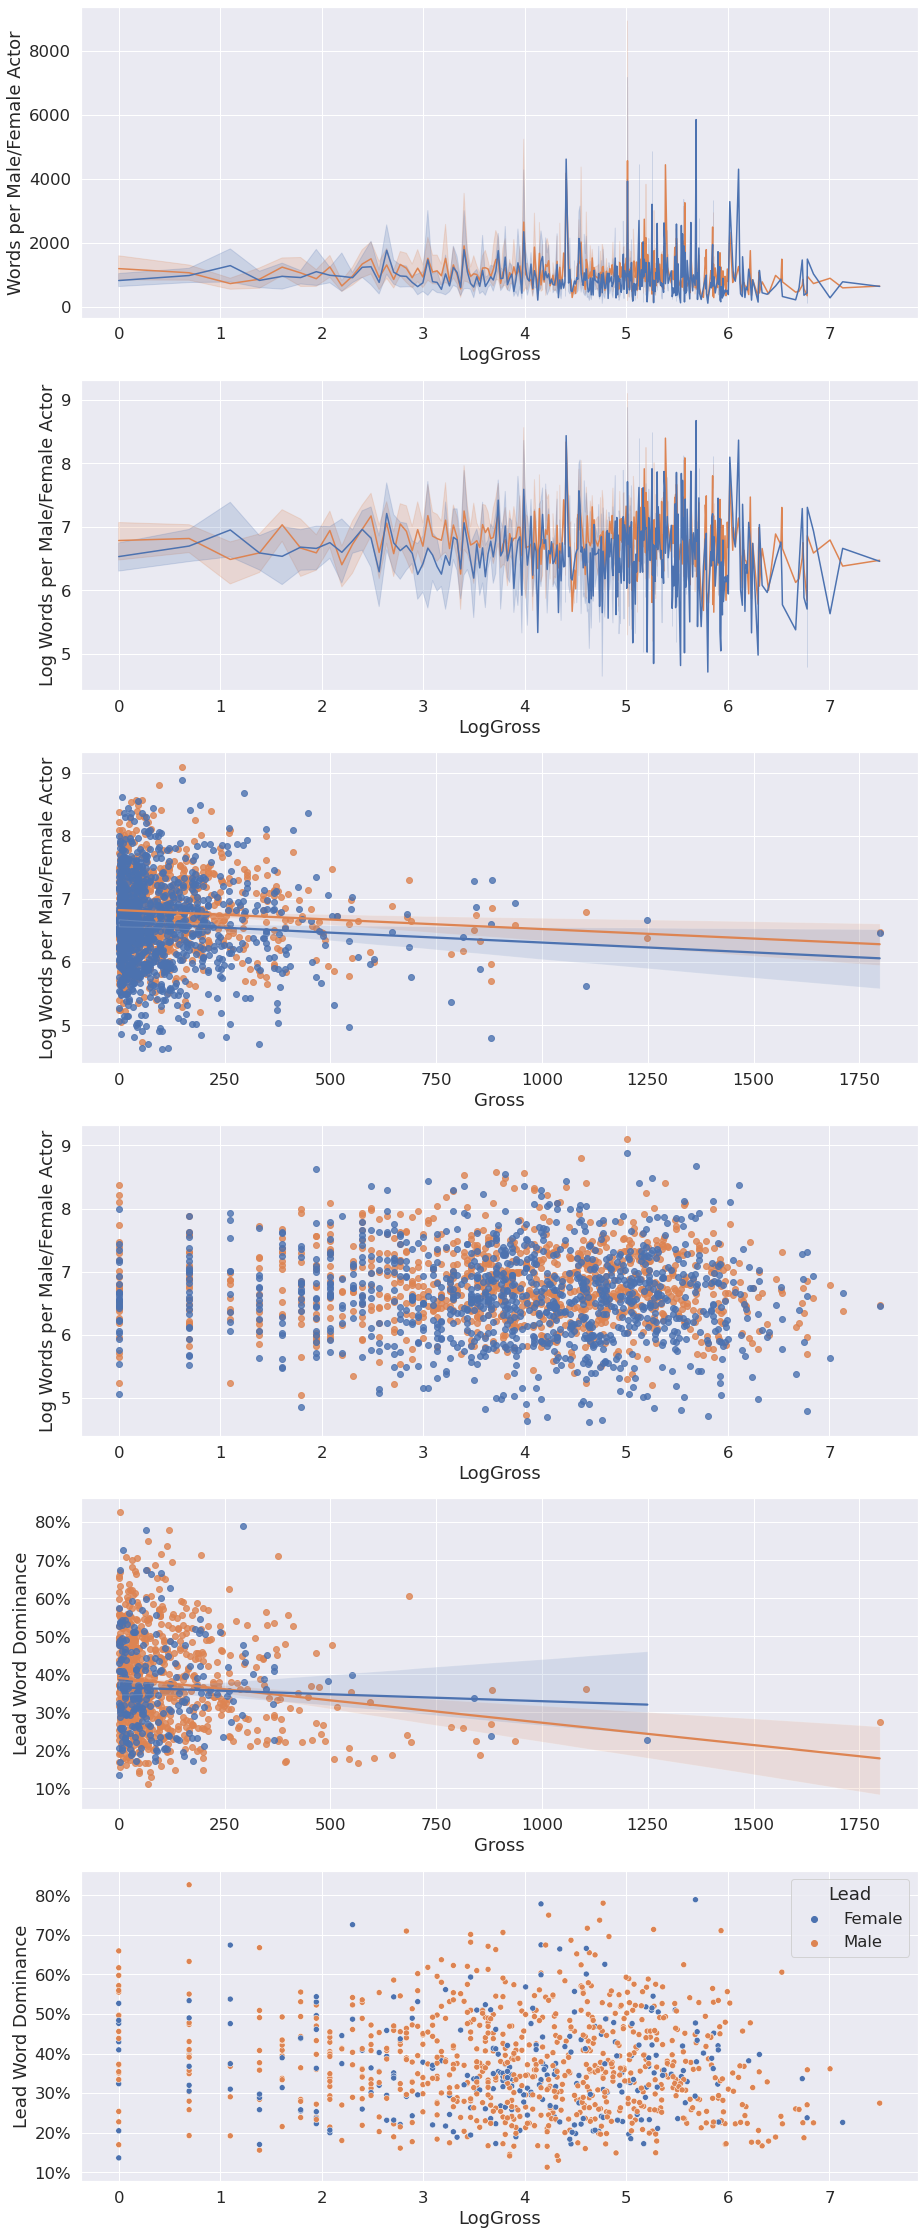

In [69]:
srow = 6
scol = 1

f = plt.figure(figsize=(15, 40))

ax = f.add_subplot(srow,scol, 1)
# female = blue, male = orange
sns.lineplot(data=train_df, x="LogGross", y="Words per Male Actor", color=sns.color_palette()[1])
sns.lineplot(data=train_df, x="LogGross", y="Words per Female Actor", color=sns.color_palette()[0])
ax.set_ylabel("Words per Male/Female Actor")

ax = f.add_subplot(srow,scol, 2)
sns.lineplot(data=train_df, x="LogGross", y="Log Words per Male Actor", color=sns.color_palette()[1])
sns.lineplot(data=train_df, x="LogGross", y="Log Words per Female Actor", color=sns.color_palette()[0])
ax.set_ylabel("Log Words per Male/Female Actor")


ax = f.add_subplot(srow,scol, 3)
sns.regplot(data=train_df, x="Gross", y="Log Words per Male Actor", color=sns.color_palette()[1])
sns.regplot(data=train_df, x="Gross", y="Log Words per Female Actor", color=sns.color_palette()[0])
ax.set_ylabel("Log Words per Male/Female Actor")

ax = f.add_subplot(srow,scol, 4)
# SVD did not converge in Linear Least Squares
sns.regplot(data=train_df, x="LogGross", y="Log Words per Male Actor", color=sns.color_palette()[1])
sns.regplot(data=train_df, x="LogGross", y="Log Words per Female Actor")
ax.set_ylabel("Log Words per Male/Female Actor")

# Lead Word Dominance
ax = f.add_subplot(srow,scol, 5)
sns.regplot(data=train_df[train_df.Lead.eq('Male')], x="Gross", y="Lead Word Dominance", color=sns.color_palette()[1])
sns.regplot(data=train_df[train_df.Lead.eq('Female')], x="Gross", y="Lead Word Dominance", color=sns.color_palette()[0])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax = f.add_subplot(srow,scol, 6)
ax = sns.scatterplot(data=train_df, x="LogGross", y="Lead Word Dominance", hue='Lead')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# ax = f.add_subplot(srow,scol, 5)
# sns.scatterplot(data=train_df, x="LogGross", y="Log Total Male/Female Words Ratio")
# ax.set_ylabel("gross and lead")

<AxesSubplot:xlabel='Year', ylabel='Lead Word Dominance'>

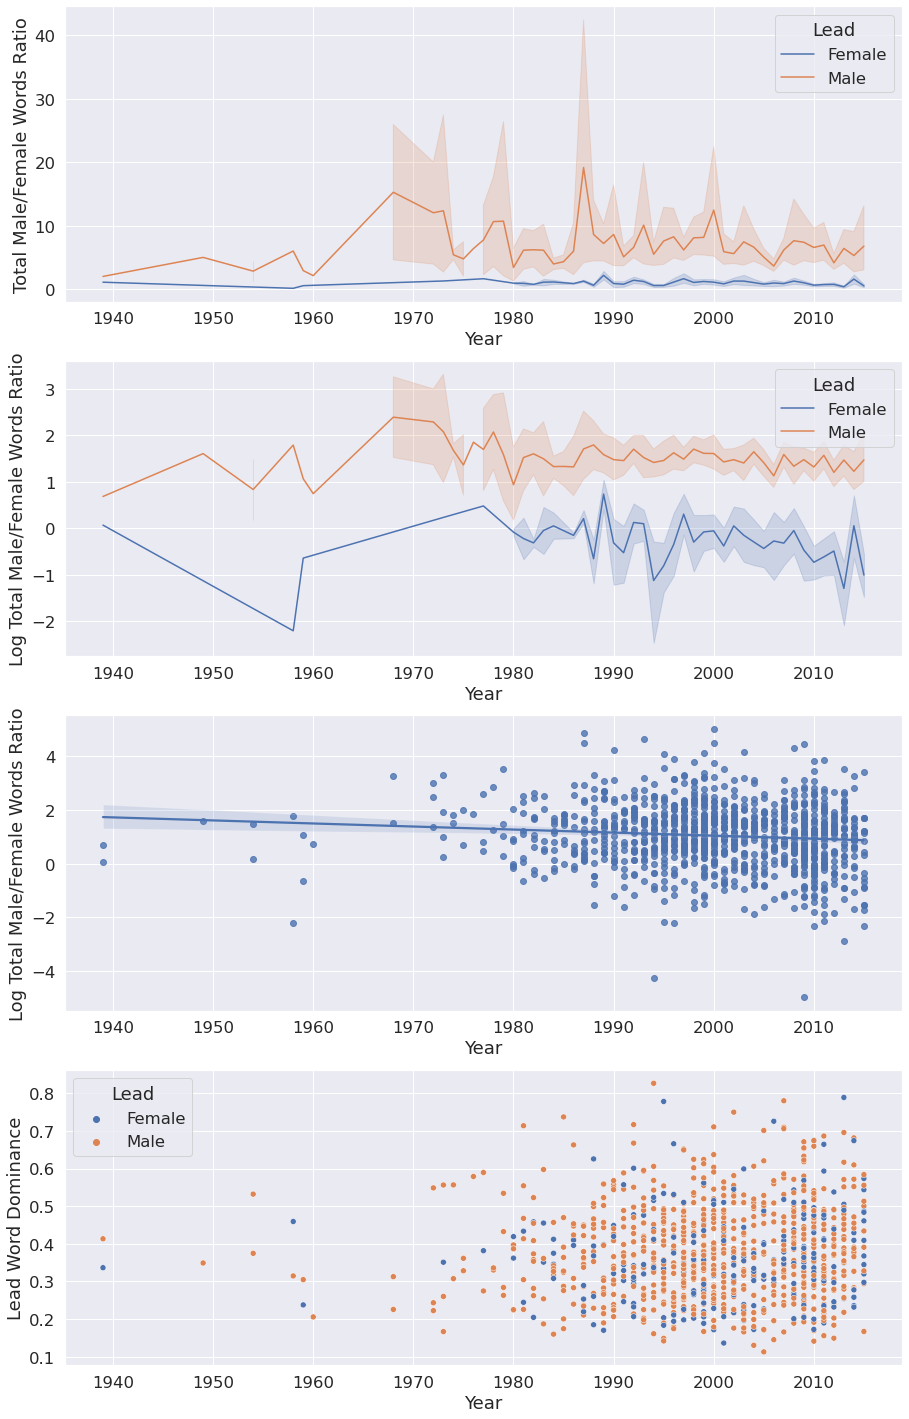

In [9]:
srow = 4
scol = 1

f = plt.figure(figsize=(15, 25))



# Total Male/Female Words Ratio
ax = f.add_subplot(srow,scol, 1)
sns.lineplot(data=train_df, x="Year", y="Total Male/Female Words Ratio", hue='Lead')

# Log Total Male/Female Words Ratio
ax = f.add_subplot(srow,scol, 2)
sns.lineplot(data=train_df, x="Year", y="Log Total Male/Female Words Ratio", hue='Lead')

# Total Male/Female Words Ratio
ax = f.add_subplot(srow,scol, 3)
sns.regplot(data=train_df, x="Year", y="Log Total Male/Female Words Ratio", order=1)

# Lead Word Dominance
ax = f.add_subplot(srow,scol, 4)
sns.scatterplot(data=train_df, x="Year", y="Lead Word Dominance", hue='Lead')

# sns.set(font_scale = 1.5)
# ax = f.add_subplot(srow,scol,4)
# sns.scatterplot(data=train_df, x="Year", y="LogGross", hue='Lead')

<AxesSubplot:xlabel='Log Total Male Words', ylabel='Log Total Female Words'>

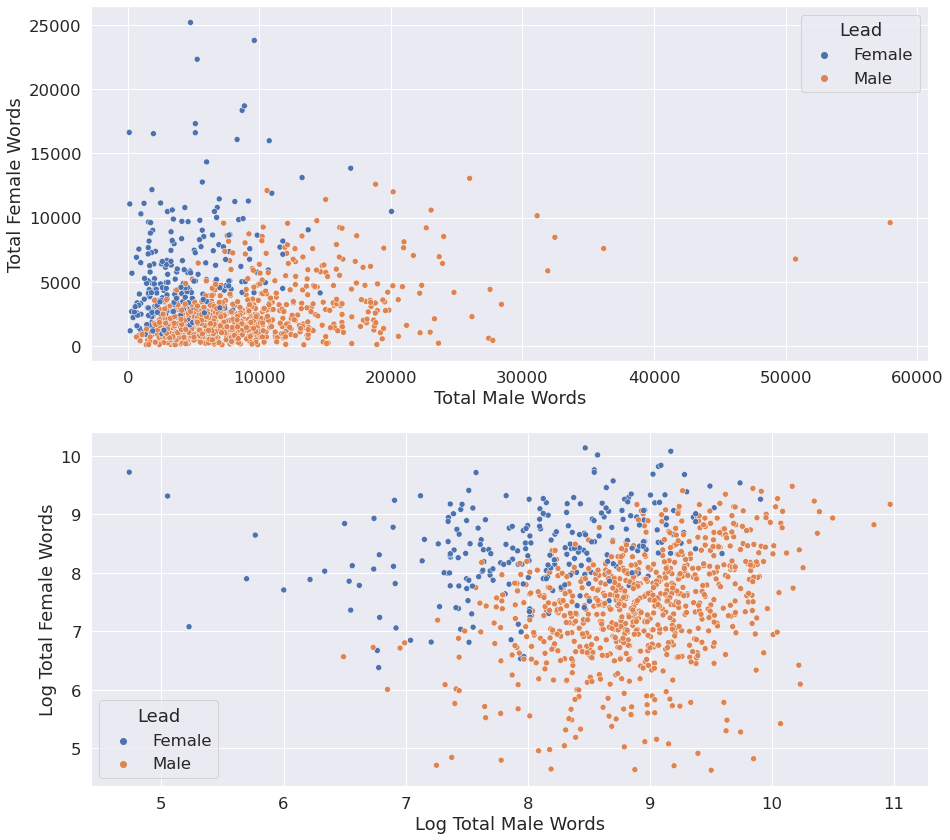

In [34]:
# Then answer the following questions based on your analysis:
# • Do men or women dominate speaking roles in Hollywood movies?
# • Has gender balance in speaking roles changed over time (i.e. years)?
# • Do films in which men do more speaking make a lot more money than films in which women
# speak more?

# if Lead is female, 'Number of words lead' is female speaking, so does 'Number words female'
srow = 4
scol = 1

f = plt.figure(figsize=(15, 30))
sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,1)
sns.scatterplot(data=train_df, x="Total Male Words", y="Total Female Words", hue='Lead')

sns.set(font_scale = 1.5)
ax = f.add_subplot(srow,scol,2)
sns.scatterplot(data=train_df, x="Log Total Male Words", y="Log Total Female Words", hue='Lead')




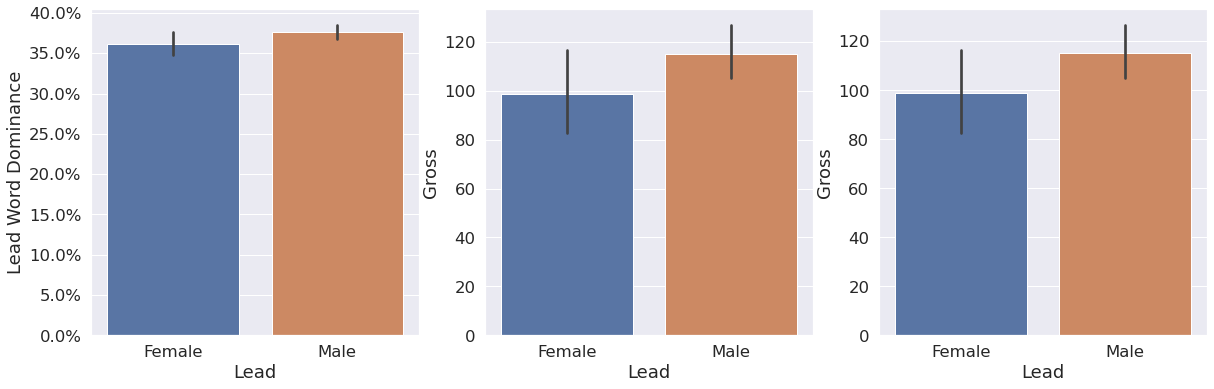

In [36]:
srow = 1
scol = 3

f = plt.figure(figsize=(20, 6))
ax = f.add_subplot(srow,scol, 1)
ax = sns.barplot(data=train_df, x="Lead", y="Lead Word Dominance")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax = f.add_subplot(srow,scol, 2)
ax = sns.barplot(data=train_df, x="Lead", y="Gross")

ax = f.add_subplot(srow,scol, 3)
ax = sns.barplot(data=train_df, x="Lead", y="Gross")

In [11]:
# srow = 4
# scol = 1

# f = plt.figure(figsize=(15, 30))
# sns.set(font_scale = 1.5)
# ax = f.add_subplot(srow,scol,1)


# bar_plot1 = sns.barplot(x = 'number', y = 'count', data = df, label = "count", color = "red")
# bar_plot2 = sns.barplot(x = 'number', y = 'select', data = df, label = "select", color = "green")

In [63]:
sns.color_palette()



[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]